In [11]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from preprocessing_helper import save_pickle, normalization, normalization_move

In [4]:
cwd = os.getcwd()
parent_wd = cwd.replace('/preprocessing', '')
processed_xy_path = parent_wd + '/preprocessing/processed_data_xy_mode'

In [3]:
with open(processed_xy_path, 'rb') as f:
    output_xy_mode_read = pickle.load(f)

## assign train/dev/test set

In [5]:
n_benchmark_withgrade = len(output_xy_mode_read['X_dict_benchmark_withgrade'])
n_benchmark_nograde = len(output_xy_mode_read['X_dict_benchmark_nograde'])
n_withgrade = len(output_xy_mode_read['X_dict_withgrade'])
n_nograde = len(output_xy_mode_read['X_dict_nograde'])
print('Number of benchmarked samples with user grade = %s' %n_benchmark_withgrade)
print('Number of benchmarked samples without user grade = %s' %n_benchmark_nograde)
print('Number of non-benchmarked samples with user grade = %s' %n_withgrade)
print('Number of non-benchmarked samples without user grade = %s' %n_nograde)

Number of benchmarked samples with user grade = 358
Number of benchmarked samples without user grade = 9
Number of non-benchmarked samples with user grade = 8607
Number of non-benchmarked samples without user grade = 21660


In [6]:
X_dict_usergrade_merge = {**output_xy_mode_read['X_dict_benchmark_withgrade'] , **output_xy_mode_read['X_dict_withgrade']}
Y_dict_usergrade_merge = {**output_xy_mode_read['Y_dict_benchmark_withgrade'] , **output_xy_mode_read['Y_dict_withgrade']}

In [7]:
X_dict_nograde_merge = {**output_xy_mode_read['X_dict_benchmark_nograde'] , **output_xy_mode_read['X_dict_nograde']}
Y_dict_nograde_merge = {**output_xy_mode_read['Y_dict_benchmark_nograde'] , **output_xy_mode_read['Y_dict_nograde']}

In [8]:
X_dict_merge = {**X_dict_usergrade_merge, **X_dict_nograde_merge}
Y_dict_merge = {**Y_dict_usergrade_merge, **Y_dict_nograde_merge}

In [9]:
n_sample = len(Y_dict_merge)
X_data_merge = np.zeros((n_sample, 30, 10))
Y_difficulties_merge = np.zeros(n_sample)
Y_isbenchmark_merge = np.zeros(n_sample)
keys_merge = []
tmax_merge = np.zeros(n_sample)

i = 0
for key, value in X_dict_merge.items():
    X_data = value.T
    X_data_merge[i, 0:X_data.shape[0], :] = X_data
    Y_difficulties_merge[i] = Y_dict_merge[key][0]
    Y_isbenchmark_merge[i] = Y_dict_merge[key][1]
    keys_merge.append(key)
    tmax_merge[i] = X_data.shape[0]
    i = i + 1

In [49]:
n_dev = 3000
n_test = 3000
n_train = n_sample - n_dev - n_test

In [53]:
shuffle = np.random.choice(np.arange(n_sample), n_sample, replace = False)

In [56]:
X_data_shuffle = X_data_merge[shuffle, :, :]
Y_difficulties_shuffle = Y_difficulties_merge[shuffle]
Y_isbenchmark_shuffle = Y_isbenchmark_merge[shuffle]
keys_shuffle = np.array(keys_merge)[shuffle]
tmax_shuffle = tmax_merge[shuffle]

In [59]:
training_set = {'X': X_data_shuffle[0:n_train], 
                'Y': Y_difficulties_shuffle[0:n_train], 
                'isbenchmark': Y_isbenchmark_shuffle[0:n_train], 
                'keys': keys_shuffle[0:n_train], 
                'tmax': tmax_shuffle[0:n_train]}
dev_set = {'X': X_data_shuffle[n_train:n_train+n_dev], 
                'Y': Y_difficulties_shuffle[n_train:n_train+n_dev], 
                'isbenchmark': Y_isbenchmark_shuffle[n_train:n_train+n_dev], 
                'keys': keys_shuffle[n_train:n_train+n_dev], 
                'tmax': tmax_shuffle[n_train:n_train+n_dev]}
test_set = {'X': X_data_shuffle[n_train+n_dev:], 
                'Y': Y_difficulties_shuffle[n_train+n_dev:], 
                'isbenchmark': Y_isbenchmark_shuffle[n_train+n_dev:], 
                'keys': keys_shuffle[n_train+n_dev:], 
                'tmax': tmax_shuffle[n_train+n_dev:]}

In [64]:
training_set_path = parent_wd + '/preprocessing/training_set'
dev_set_path = parent_wd + '/preprocessing/dev_set'
test_set_path = parent_wd + '/preprocessing/test_set'
save_pickle(training_set, training_set_path)
save_pickle(dev_set, dev_set_path)
save_pickle(test_set, test_set_path)

Text(0,0.5,'number count')

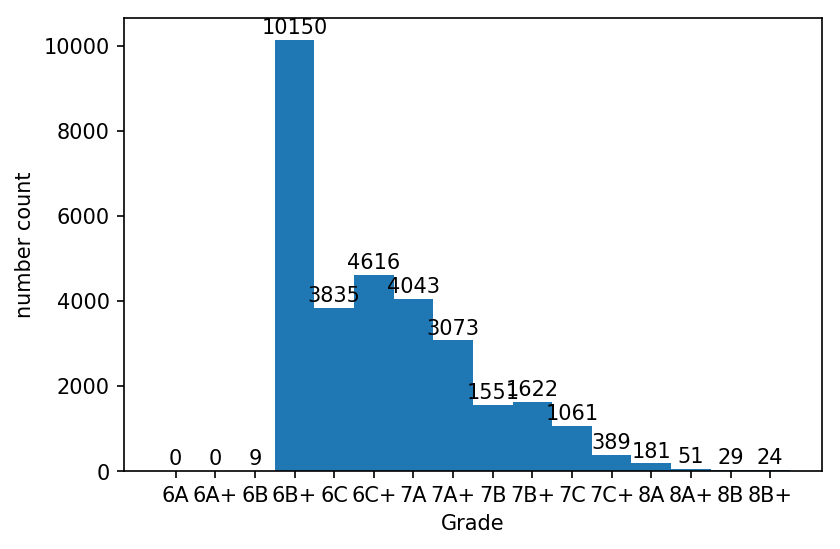

In [64]:
plt.figure(dpi = 150)
result = plt.hist(Y_difficulties_merge, bins = np.arange(17)-0.5)
for x,y in zip(np.arange(16),result[0]):

    label = str(int(y))

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.xticks(np.arange(16), ['6A','6A+','6B','6B+','6C','6C+','7A','7A+','7B','7B+','7C','7C+','8A','8A+','8B','8B+'])
plt.xlabel('Grade')
#plt.yscale('log')
plt.ylabel('number count')

## New sequence based data

In [1]:
fail_list = ['363336', 
             '363335', 
             '350368', 
             '349610', 
             '349049', 
             '348915', 
             '348858', 
             '348670', 
             '348669', 
             '348432', 
             '346738', 
             '344743', 
             '339916', 
             '339325', 
             '337916', 
             '335566', 
             '312004', 
             '310949', 
             '309657', 
             '309311', 
             '248997', 
             '246092', 
             '231401', 
             '231392', 
             '19362']

In [44]:
X_path_all = [cwd + '/benchmark_withgrade_move_seq_X', 
              cwd + '/benchmark_nograde_move_seq_X', 
              cwd + '/nonbenchmark_withgrade_move_seq_X', 
              cwd + '/nonbenchmark_nograde_move_seq_X']
Y_path_all = [cwd + '/benchmark_withgrade_move_seq_Y', 
              cwd + '/benchmark_nograde_move_seq_Y', 
              cwd + '/nonbenchmark_withgrade_move_seq_Y', 
              cwd + '/nonbenchmark_nograde_move_seq_Y']

In [45]:
X_seq_dict_merge = {}
Y_seq_dict_merge = {}
for path in X_path_all:
    with open(path, 'rb') as f:
        read_dict = pickle.load(f)
    X_seq_dict_merge = {**X_seq_dict_merge, **read_dict}
for path in Y_path_all:
    with open(path, 'rb') as f:
        read_dict = pickle.load(f)
    Y_seq_dict_merge = {**Y_seq_dict_merge, **read_dict}

In [46]:
for key in fail_list:
    try:
        del X_seq_dict_merge[key]
    except:
        pass
    try:
        del Y_seq_dict_merge[key]
    except:
        pass
assert len(X_seq_dict_merge) == len(Y_seq_dict_merge)

In [47]:
save_pickle(X_seq_dict_merge, cwd + '/X_seq_dict_merge')
save_pickle(Y_seq_dict_merge, cwd + '/Y_seq_dict_merge')

In [105]:
n_sample = len(Y_seq_dict_merge)
X_seq_data_merge = np.zeros((n_sample, 23, 22))
Y_seq_grade_merge = np.zeros(n_sample)
keys_seq_merge = []
tmax_seq_merge = np.zeros(n_sample)

i = 0
for key, value in X_seq_dict_merge.items():
    X_data = value.T
    X_seq_data_merge[i, 0:X_data.shape[0], :] = X_data
    Y_seq_grade_merge[i] = Y_seq_dict_merge[key]
    keys_seq_merge.append(key)
    tmax_seq_merge[i] = X_data.shape[0]
    i = i + 1

Text(0,0.5,'number count')

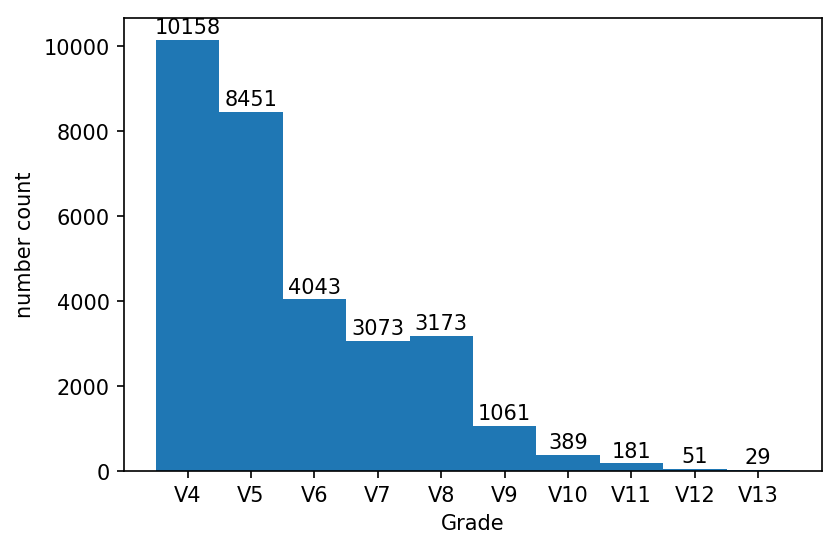

In [106]:
plt.figure(dpi = 150)
result = plt.hist(Y_seq_grade_merge, bins = np.arange(11)-0.5)
for x,y in zip(np.arange(10),result[0]):
    label = str(int(y))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.xticks(np.arange(10), ['V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'])
plt.xlabel('Grade')
#plt.yscale('log')
plt.ylabel('number count')

In [107]:
n_dev = 3000
n_test = 3000
n_train = n_sample - n_dev - n_test
print(n_train)

24609


In [108]:
np.random.seed(0)
shuffle = np.random.choice(np.arange(n_sample), n_sample, replace = False)

In [109]:
X_seq_shuffle = X_seq_data_merge[shuffle, :, :]
Y_seq_shuffle = Y_seq_grade_merge[shuffle]
keys_seq_shuffle = np.array(keys_seq_merge)[shuffle]
tmax_seq_shuffle = tmax_seq_merge[shuffle]

In [110]:
training_set_seq = {'X': X_seq_shuffle[0:n_train], 
                'Y': Y_seq_shuffle[0:n_train], 
                'keys': keys_seq_shuffle[0:n_train], 
                'tmax': tmax_seq_shuffle[0:n_train]}
dev_set_seq = {'X': X_seq_shuffle[n_train:n_train+n_dev], 
                'Y': Y_seq_shuffle[n_train:n_train+n_dev], 
                'keys': keys_seq_shuffle[n_train:n_train+n_dev], 
                'tmax': tmax_seq_shuffle[n_train:n_train+n_dev]}
test_set_seq = {'X': X_seq_shuffle[n_train+n_dev:], 
                'Y': Y_seq_shuffle[n_train+n_dev:],  
                'keys': keys_seq_shuffle[n_train+n_dev:], 
                'tmax': tmax_seq_shuffle[n_train+n_dev:]}

In [55]:
training_set_path = parent_wd + '/preprocessing/training_set_seq'
dev_set_path = parent_wd + '/preprocessing/dev_set_seq'
test_set_path = parent_wd + '/preprocessing/test_set_seq'
save_pickle(training_set_seq, training_set_path)
save_pickle(dev_set_seq, dev_set_path)
save_pickle(test_set_seq, test_set_path)

### Move based Data

In [75]:
n_sample = len(Y_seq_dict_merge)
total_t = int(np.sum(tmax_seq_shuffle))
X_move_data_merge = np.zeros((total_t, 22))
Y_move_grade_merge = np.zeros(total_t)
keys_move_merge = np.zeros(total_t)

i = 0
for key, value in X_seq_dict_merge.items():
    X_data = value.T
    tmax = X_data.shape[0]
    X_move_data_merge[i:i+tmax, :] = X_data
    Y_move_grade_merge[i:i+tmax] = Y_seq_dict_merge[key]
    keys_move_merge[i:i+tmax] = key
    i += tmax

Text(0,0.5,'number count')

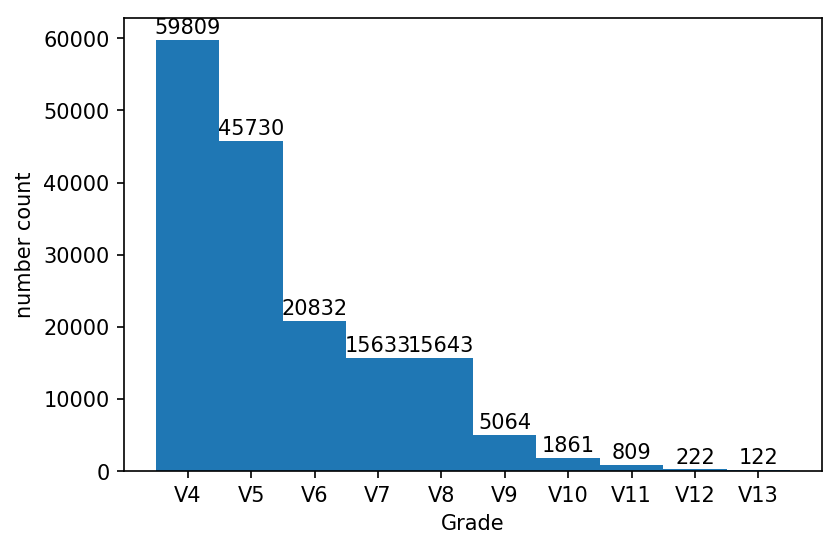

In [87]:
plt.figure(dpi = 150)
result = plt.hist(Y_move_grade_merge, bins = np.arange(11)-0.5)
for x,y in zip(np.arange(10),result[0]):
    label = str(int(y))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.xticks(np.arange(10), ['V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'])
plt.xlabel('Grade')
#plt.yscale('log')
plt.ylabel('number count')

In [114]:
n_sample = len(Y_move_grade_merge)
n_dev = 3000
n_test = 3000
n_train = n_sample - n_dev - n_test
print(n_train)

159725


In [115]:
np.random.seed(0)
shuffle = np.random.choice(np.arange(n_sample), n_sample, replace = False)

In [116]:
X_move_shuffle = X_move_data_merge[shuffle, :]
Y_move_shuffle = Y_move_grade_merge[shuffle]
keys_move_shuffle = keys_move_merge[shuffle]

In [117]:
training_set_move = {'X': X_move_shuffle[0:n_train], 
                'Y': Y_move_shuffle[0:n_train], 
                'keys': keys_move_shuffle[0:n_train]}
dev_set_move = {'X': X_move_shuffle[n_train:n_train+n_dev], 
                'Y': Y_move_shuffle[n_train:n_train+n_dev], 
                'keys': keys_move_shuffle[n_train:n_train+n_dev]}
test_set_move = {'X': X_move_shuffle[n_train+n_dev:], 
                'Y': Y_move_shuffle[n_train+n_dev:],  
                'keys': keys_move_shuffle[n_train+n_dev:]}

In [92]:
training_set_path = parent_wd + '/preprocessing/training_set_move'
dev_set_path = parent_wd + '/preprocessing/dev_set_move'
test_set_path = parent_wd + '/preprocessing/test_set_move'
save_pickle(training_set_move, training_set_path)
save_pickle(dev_set_move, dev_set_path)
save_pickle(test_set_move, test_set_path)

### normalization

In [111]:
training_seq_normalized = normalization(training_set_seq)
dev_seq_normalized = normalization(dev_set_seq)
test_seq_normalized = normalization(test_set_seq)

In [113]:
training_normalized_set_path = parent_wd + '/preprocessing/training_seq_n'
dev_normalized_set_path = parent_wd + '/preprocessing/dev_seq_n'
test_normalized_set_path = parent_wd + '/preprocessing/test_seq_n'
save_pickle(training_seq_normalized, training_normalized_set_path)
save_pickle(dev_seq_normalized, dev_normalized_set_path)
save_pickle(test_seq_normalized, test_normalized_set_path)

In [118]:
training_move_normalized = normalization_move(training_set_move)
dev_move_normalized = normalization_move(dev_set_move)
test_move_normalized = normalization_move(test_set_move)

In [120]:
training_normalized_set_path = parent_wd + '/preprocessing/training_move_n'
dev_normalized_set_path = parent_wd + '/preprocessing/dev_move_n'
test_normalized_set_path = parent_wd + '/preprocessing/test_move_n'
save_pickle(training_move_normalized, training_normalized_set_path)
save_pickle(dev_move_normalized, dev_normalized_set_path)
save_pickle(test_move_normalized, test_normalized_set_path)